In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
housing_data = pd.read_csv("Maricopa_County_Housing_data.csv")

In [3]:
housing_data.head()

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Property_Type,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type
0,85003,AF,1,1.0,720,340.28,Residential,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0.0,$,3.00,%
1,85003,LS,1,1.0,755,430.46,Residential,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0.0,%,0.00,$
2,85003,SF,4,3.0,"3,415",439.23,Residential,Detached,1940,"11,696",...,Yes,Yes,2.0,0.0,Conventional,Fixed,0.0,$,0.00,$
3,85003,AF,1,1.0,710,436.61,Residential,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0.0,$,6000.00,$
4,85003,AF,2,2.5,"1,510",314.56,Residential,Stacked,2007,654,...,NaN,Yes,2.0,0.0,Conventional,Fixed,0.0,$,3.75,%


In [4]:
housing_data.isna().sum()

Zip_Code                         0
Dwelling_Type                    0
Nr_Bedrooms                      0
Nr_Bathrooms                     0
Approx_SQFT                      0
Price_per_SqFt                   0
Property_Type                    0
Dwelling_Styles                  0
Year_Built                       0
Approx_Lot_SqFt                  0
Pool                          1065
HOA_Fee                        917
Land_Lease_Fee                   0
Clubhouse_Rec_Room            2246
Basement                         0
RV_Gate                       2618
List_Price                       0
Sold_Price                       0
Building_Style                2885
Gated_Community               2394
Workout_Facility              2498
Garage_Spaces                    0
Carport_Spaces                   0
Loan_Type                        0
Payment_Type                   950
Buyer_Concession_to_Seller       0
Buyer_Concession_type            0
Seller_Concession_to_Buyer       0
Seller_Concession_ty

In [5]:
housing_data["Zip_Code"].unique()

array([85003, 85004, 85006, 85007, 85008, 85009, 85012, 85013, 85014,
       85015, 85016, 85017, 85018, 85019, 85020, 85021, 85022, 85023,
       85024, 85027, 85028, 85029, 85031, 85032, 85033, 85035, 85037,
       85040, 85041, 85042, 85043, 85044, 85045, 85048, 85050, 85051,
       85053, 85054, 85083, 85085, 85086, 85087, 85119, 85120, 85139,
       85142, 85201, 85202, 85203, 85204, 85205, 85206, 85207, 85208,
       85209, 85210, 85212, 85213, 85215, 85224, 85225, 85226, 85233,
       85234, 85248, 85249, 85250, 85251, 85253, 85254, 85255, 85257,
       85258, 85259, 85260, 85262, 85263, 85266, 85268, 85323, 85326,
       85375, 85377, 85378, 85379, 85395, 85396, 85541], dtype=int64)

In [6]:
housing_data.shape

(3117, 29)

In [7]:
housing_data["Dwelling_Type"].unique()

array(['AF', 'LS', 'SF', 'TH', 'PH', 'MM', 'GT', 'MD'], dtype=object)

In [8]:
housing_data['Dwelling_Type'].value_counts()

Dwelling_Type
SF    2308
TH     330
AF     239
MM     177
PH      56
LS       3
GT       3
MD       1
Name: count, dtype: int64

In [9]:
housing_data["Nr_Bedrooms"].unique()

array([1, 4, 2, 3, 5, 6, 7, 0], dtype=int64)

In [10]:
housing_data["Nr_Bathrooms"].unique()

array([1.  , 3.  , 2.5 , 1.75, 2.  , 1.5 , 4.5 , 4.  , 3.5 , 2.75, 6.  ,
       5.5 , 7.  , 5.  , 2.25, 6.5 , 3.75, 1.25, 8.  ])

In [11]:
housing_data.dtypes

Zip_Code                        int64
Dwelling_Type                  object
Nr_Bedrooms                     int64
Nr_Bathrooms                  float64
Approx_SQFT                    object
Price_per_SqFt                 object
Property_Type                  object
Dwelling_Styles                object
Year_Built                      int64
Approx_Lot_SqFt                object
Pool                           object
HOA_Fee                       float64
Land_Lease_Fee                 object
Clubhouse_Rec_Room             object
Basement                       object
RV_Gate                        object
List_Price                     object
Sold_Price                     object
Building_Style                 object
Gated_Community                object
Workout_Facility               object
Garage_Spaces                 float64
Carport_Spaces                float64
Loan_Type                      object
Payment_Type                   object
Buyer_Concession_to_Seller    float64
Buyer_Conces

In [12]:
housing_data["Approx_SQFT"].describe()

count      3117
unique     1734
top       1,400
freq         11
Name: Approx_SQFT, dtype: object

In [13]:
# "Approx_SQFT" is an object column, and it should be an integer
# This is because the values have comma in them
# We need to remove commas before converting the values to int
housing_data["Approx_SQFT"] = housing_data["Approx_SQFT"].apply(lambda x: x.replace(",", ""))

In [14]:
housing_data["Approx_SQFT"] = housing_data["Approx_SQFT"].astype(int)

In [15]:
housing_data["Approx_SQFT"].describe()

count    3117.000000
mean     1948.820661
std       923.387933
min         1.000000
25%      1327.000000
50%      1766.000000
75%      2311.000000
max      8151.000000
Name: Approx_SQFT, dtype: float64

In [16]:
housing_data["Price_per_SqFt"].describe()

count      3117
unique     2892
top       312.5
freq          5
Name: Price_per_SqFt, dtype: object

In [17]:
# "Price_per_Sqft" is an object column. Remove commas and change type to "float"
housing_data["Price_per_SqFt"] = housing_data["Price_per_SqFt"].apply(lambda x: x.replace(",", ""))

In [18]:
housing_data["Price_per_SqFt"] = housing_data["Price_per_SqFt"].astype(float)

In [19]:
housing_data["Price_per_SqFt"].describe()

count      3117.000000
mean        362.590696
std        3131.718320
min          14.160000
25%         237.480000
50%         284.260000
75%         342.000000
max      175000.000000
Name: Price_per_SqFt, dtype: float64

In [20]:
housing_data["Property_Type"].unique()

array(['Residential'], dtype=object)

In [21]:
# "Property_Type" doesn't provide any value as it has the same value
# for all the columns
housing_data["Property_Type"].value_counts()

Property_Type
Residential    3117
Name: count, dtype: int64

In [22]:
# Dropping "Property_Type" column. It only shows data set is for residential properties. 
housing_data.drop("Property_Type", axis=1, inplace=True)

In [23]:
housing_data.shape

(3117, 28)

In [24]:
#  this is categorical data 
housing_data["Dwelling_Styles"].unique()

array(['Stacked', 'Detached', 'Attached'], dtype=object)

In [25]:
housing_data["Year_Built"].unique()

array([1964, 2005, 1940, 2007, 2016, 2004, 1963, 1920, 1943, 1911, 1947,
       1958, 1948, 1929, 1945, 1950, 1935, 1952, 1955, 1973, 1966, 1951,
       2002, 1956, 1985, 1999, 1970, 2023, 1928, 1925, 1989, 1982, 1946,
       1980, 1932, 1944, 2019, 1961, 1931, 1954, 2008, 1978, 1965, 1996,
       1957, 1979, 1972, 1998, 1975, 1933, 2017, 2021, 1991, 1953, 1941,
       1974, 1986, 1981, 1967, 1949, 1984, 2018, 2006, 1968, 1988, 1977,
       1995, 2003, 1992, 2000, 2024, 2022, 1990, 1976, 2010, 1959, 1962,
       2015, 1971, 1960, 1987, 2001, 1937, 1993, 1983, 1994, 1997, 2012,
       2020, 1969, 2014, 2013, 2011, 1927, 1942, 2009, 1919, 1936],
      dtype=int64)

In [26]:
housing_data["Approx_Lot_SqFt"] = housing_data["Approx_Lot_SqFt"].apply(lambda x: x.replace(",", ""))

In [27]:
housing_data["Approx_Lot_SqFt"] = housing_data["Approx_Lot_SqFt"].astype(int)

In [28]:
housing_data["Approx_Lot_SqFt"].describe()

count    3.117000e+03
mean     2.769501e+04
std      9.995417e+05
min      0.000000e+00
25%      4.000000e+03
50%      6.707000e+03
75%      9.148000e+03
max      5.580036e+07
Name: Approx_Lot_SqFt, dtype: float64

In [29]:
# 'nan' is an information in itself, it means 'no pool'. 
housing_data["Pool"].unique()

array(['Community', 'Private', nan, 'Both'], dtype=object)

In [30]:
housing_data["Pool"] = housing_data["Pool"].fillna("no_pool")

In [31]:
housing_data["Pool"].unique()

array(['Community', 'Private', 'no_pool', 'Both'], dtype=object)

In [32]:
# "HOA_Fee" has null values
# Create another variable which says whether the field is null
housing_data["HOA_Missing"] = housing_data["HOA_Fee"].isna().astype(int)

In [33]:
# this filters the housing_data dataframe to include only rows where the value in the "HOA_Missing" is zero. Then select "HOA_Fee" column 
# and compute descriptive statistics.
housing_data[housing_data["HOA_Missing"]==0]["HOA_Fee"].describe()

count    2200.000000
mean      326.731205
std       486.743921
min         0.000000
25%       115.375000
50%       212.000000
75%       350.000000
max      9102.000000
Name: HOA_Fee, dtype: float64

In [34]:
pd.set_option('display.max_columns', None)
housing_data.head(15)

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing
0,85003,AF,1,1.00,720,340.28,Stacked,1964,652,Community,567.00,N,Yes,BASEMENT Y/N: N,Yes,"247,000","245,000",High Rise,Yes,Yes,0.0,1.0,Conventional,Fixed,0.0,$,3.00,%,0
1,85003,LS,1,1.00,755,430.46,Stacked,2005,751,Private,631.00,N,Yes,BASEMENT Y/N: N,Yes,"335,000","325,000",High Rise,Yes,Yes,0.0,0.0,VA,Fixed,0.0,%,0.00,$,0
2,85003,SF,4,3.00,3415,439.23,Detached,1940,11696,no_pool,555.63,N,Yes,BASEMENT Y/N: Y,Yes,"1,595,000","1,500,000",High Rise,Yes,Yes,2.0,0.0,Conventional,Fixed,0.0,$,0.00,$,0
3,85003,AF,1,1.00,710,436.61,Stacked,2005,0,Community,671.17,N,Yes,BASEMENT Y/N: N,Yes,"315,000","310,000",High Rise,Yes,Yes,0.0,0.0,Conventional,Adjustable,0.0,$,6000.00,$,0
4,85003,AF,2,2.50,1510,314.56,Stacked,2007,654,Community,567.93,N,Yes,BASEMENT Y/N: N,NaN,"469,900","475,000",High Rise,NaN,Yes,2.0,0.0,Conventional,Fixed,0.0,$,3.75,%,0
5,85003,AF,1,1.00,893,671.89,Attached,2016,820,Community,1280.40,N,Yes,BASEMENT Y/N: N,NaN,"625,000","600,000",High Rise,NaN,Yes,1.0,0.0,Cash,Fixed,0.0,%,0.00,%,0
6,85004,AF,2,1.75,1456,346.84,Stacked,1964,148,Community,761.81,N,Yes,BASEMENT Y/N: N,NaN,"525,000","505,000",High Rise,NaN,Yes,1.0,0.0,Cash,Fixed,0.0,$,0.00,$,0
7,85004,AF,2,2.50,1463,380.72,Stacked,2007,1558,Community,693.77,N,Yes,BASEMENT Y/N: N,NaN,"568,000","557,000",High Rise,NaN,Yes,1.0,0.0,Conventional,Fixed,0.0,$,0.00,$,0
8,85004,AF,2,2.00,1624,354.06,Stacked,2004,924,Community,1280.40,N,Yes,BASEMENT Y/N: N,NaN,"575,000","575,000",High Rise,NaN,NaN,2.0,0.0,Conventional,Fixed,0.0,$,2000.00,$,0
9,85004,AF,2,1.75,1456,346.84,Stacked,1964,148,Community,761.81,N,Yes,BASEMENT Y/N: N,NaN,"525,000","505,000",NaN,NaN,NaN,1.0,0.0,Cash,Fixed,0.0,$,0.00,$,0


In [35]:
housing_data["Land_Lease_Fee"].unique()

array(['N', 'Y'], dtype=object)

In [36]:
housing_data["Land_Lease_Fee"].value_counts()

Land_Lease_Fee
N    3015
Y     102
Name: count, dtype: int64

In [37]:
housing_data["Clubhouse_Rec_Room"].unique()

array(['Yes', nan], dtype=object)

In [38]:
housing_data["Clubhouse_Rec_Room"] = housing_data["Clubhouse_Rec_Room"].fillna("No")

In [39]:
housing_data["Clubhouse_Rec_Room"].value_counts()

Clubhouse_Rec_Room
No     2246
Yes     871
Name: count, dtype: int64

In [40]:
housing_data["Basement"].unique()

array(['BASEMENT Y/N:\xa0N', 'BASEMENT Y/N:\xa0Y'], dtype=object)

In [41]:
# discrete values for "Basement" need to be a "Y" or a "N". Below I replace values so Y or N will show only
housing_data["Basement"] = housing_data["Basement"].apply(lambda x: "N" if x == 'BASEMENT Y/N:\xa0N' else "Y")

In [42]:
# of all the properties in this data set only 43 of them have a basement
housing_data["Basement"].value_counts()

Basement
N    3074
Y      43
Name: count, dtype: int64

In [43]:
housing_data["RV_Gate"].unique()

array(['Yes', nan], dtype=object)

In [44]:
# RV_Gate needs a Y or N value. Code below takes care of that
housing_data["RV_Gate"] = housing_data["RV_Gate"].fillna("No")

In [45]:
# of all properties, there are 499 properties that have RV Gate and 2618 that don't
housing_data["RV_Gate"].value_counts()

RV_Gate
No     2618
Yes     499
Name: count, dtype: int64

In [46]:
# "List_Price" must be an integer. To do that comma must be removed then turn type in an integer
housing_data["List_Price"] = housing_data["List_Price"].apply(lambda x: x.replace(",", ""))

In [47]:
# convert to integers
housing_data["List_Price"] = housing_data["List_Price"].astype(int)

In [48]:
housing_data["List_Price"].describe()

count    3.117000e+03
mean     6.485430e+05
std      6.298170e+05
min      1.000000e+04
25%      3.680000e+05
50%      4.800000e+05
75%      6.970000e+05
max      1.036400e+07
Name: List_Price, dtype: float64

In [49]:
housing_data["Sold_Price"] = housing_data["Sold_Price"].apply(lambda x: x.replace(",", "")) # remove commas
housing_data["Sold_Price"] = housing_data["Sold_Price"].astype(int)                         # convert to integers
housing_data["Sold_Price"].describe()                                                       # run descriptive statistics

count    3.117000e+03
mean     6.352639e+05
std      6.138111e+05
min      1.000000e+04
25%      3.600000e+05
50%      4.750000e+05
75%      6.808880e+05
max      1.036400e+07
Name: Sold_Price, dtype: float64

In [50]:
housing_data["Building_Style"].unique()

array(['High Rise', nan, '2-3-4 Plex', 'Clustered', 'String',
       'Clustered · High Rise', '2-3-4 Plex · Clustered'], dtype=object)

In [51]:
housing_data["Building_Style"] = housing_data["Building_Style"].fillna("Missing")

In [52]:
housing_data['Building_Style'].value_counts()

Building_Style
Missing                   2885
Clustered                   75
String                      67
2-3-4 Plex                  49
High Rise                   39
Clustered · High Rise        1
2-3-4 Plex · Clustered       1
Name: count, dtype: int64

In [53]:
housing_data["Gated_Community"].unique()

array(['Yes', nan], dtype=object)

In [54]:
housing_data["Gated_Community"] = housing_data["Gated_Community"].fillna("No")

In [55]:
# there are 723 gated communities and 2394 that are not gated communities
housing_data["Gated_Community"].value_counts()

Gated_Community
No     2394
Yes     723
Name: count, dtype: int64

In [56]:
housing_data["Workout_Facility"].unique()

array(['Yes', nan], dtype=object)

In [57]:
housing_data["Workout_Facility"] = housing_data["Workout_Facility"].fillna("No")

In [58]:
# there are 619 properties, out of 3117, with access to a Workout_Facility in their respective community.
housing_data["Workout_Facility"].value_counts()

Workout_Facility
No     2498
Yes     619
Name: count, dtype: int64

In [59]:
housing_data["Garage_Spaces"].unique()

array([ 0. ,  2. ,  1. ,  3. ,  4. ,  1.5,  2.5,  6. , 10. ,  9. ,  5. ,
        6.5,  3.5,  4.5, 18. , 14. ,  7. ])

In [60]:
housing_data["Carport_Spaces"].unique()

array([1. , 0. , 2. , 6. , 4. , 1.5, 3. ])

In [61]:
housing_data["Loan_Type"].unique()

array(['Conventional', 'VA', 'Cash', 'FHA', 'Other', 'Cash to Loan',
       'Carryback', 'Exchange', 'USDA'], dtype=object)

In [62]:
housing_data["Loan_Type"].value_counts()

Loan_Type
Conventional    1487
Cash             878
FHA              396
Other            196
VA               138
Carryback         13
Exchange           5
Cash to Loan       2
USDA               2
Name: count, dtype: int64

In [63]:
# fixed rate financing accounts for 52% of home purchases but data needs to be imputed using "Loan_Type" column if not dropped outright
housing_data["Payment_Type"].value_counts()

Payment_Type
Fixed            1625
Other             515
Adjustable         13
Balloon            10
Interest Only       3
Graduated           1
Name: count, dtype: int64

In [64]:
housing_data["Payment_Type"].isna().sum()

950

In [65]:
housing_data["Payment_Type"] = housing_data["Payment_Type"].fillna("Missing")

In [66]:
housing_data["Payment_Type"].value_counts()

Payment_Type
Fixed            1625
Missing           950
Other             515
Adjustable         13
Balloon            10
Interest Only       3
Graduated           1
Name: count, dtype: int64

In [67]:
housing_data["Buyer_Concession_to_Seller"].describe()

count     3117.000000
mean        84.598973
std       1187.284533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34475.000000
Name: Buyer_Concession_to_Seller, dtype: float64

In [68]:
# counting how many sales had zero concessions from Buyers to Sellers
buyer_to_seller_zero_counts = housing_data[['Buyer_Concession_type', 'Buyer_Concession_to_Seller']][housing_data['Buyer_Concession_to_Seller'] == 0].value_counts()
print(buyer_to_seller_zero_counts)

Buyer_Concession_type  Buyer_Concession_to_Seller
$                      0.0                           2587
%                      0.0                            480
Name: count, dtype: int64


In [69]:
# counting how many sales had zero concessions from Sellers to Buyers
seller_to_buyer_zero_counts = housing_data[['Seller_Concession_type', 'Seller_Concession_to_Buyer']][housing_data['Seller_Concession_to_Buyer'] == 0].value_counts()
print(seller_to_buyer_zero_counts)

Seller_Concession_type  Seller_Concession_to_Buyer
$                       0.0                           1547
%                       0.0                            245
Name: count, dtype: int64


In [70]:
# filter data for errors where listing agent typed "%" instead of "$" for  Buyers->Sellers 
housing_data.loc[(housing_data['Buyer_Concession_to_Seller'] >5) & (housing_data['Buyer_Concession_type'] == '%')]


,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing
955,85053,TH,3,2.0,1506,245.68,Attached,1991,3085,Both,NaN,N,No,N,No,375000,370000,Missing,No,No,2.0,0.0,Conventional,Missing,10000.0,%,0.0,%,1
1336,85201,TH,2,1.5,1100,259.09,Attached,1974,797,Community,NaN,N,No,N,No,287499,285000,Missing,No,No,0.0,1.0,Conventional,Missing,100.0,%,4600.0,%,1


In [71]:
# getting the index for data where listing agent typed "$" instead of "%" for Buyers->Sellers 
housing_data.loc[(housing_data['Buyer_Concession_to_Seller'] >5) & (housing_data['Buyer_Concession_type'] == '%')].index

Index([955, 1336], dtype='int64')

In [72]:
# replace % with $
housing_data.loc[[955,1336],'Buyer_Concession_type'] = '$'

In [73]:
# check if there are any rows with errors of $ instead of % for 'Buyer_Concession_to_Seller'
housing_data.loc[(housing_data['Buyer_Concession_to_Seller'] >5) & (housing_data['Buyer_Concession_type'] == '%')]
# data looks good now

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing


**Repeat same logic for Seller_Concession_to_Buyer**

In [74]:
##############################################################################################

In [75]:
# filter data for errors where listing agent typed "%" instead of "$" for Sellers -> Buyers 
housing_data.loc[(housing_data['Seller_Concession_to_Buyer'] >7) & (housing_data['Seller_Concession_type'] == '%')]

# It appears Listing agents made many more errors, when typing % instead of $ for Seller offered concessions to Buyers

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing
335,85021,SF,3,2.00,1840,266.30,Detached,2000,13320,no_pool,NaN,N,No,N,No,500000,490000,Missing,No,No,2.0,2.0,Conventional,Missing,0.0,%,8000.0,%,1
423,85024,TH,2,2.00,1091,338.13,Attached,2012,1972,Community,1210.00,N,No,N,No,368900,368900,Missing,Yes,No,1.0,0.0,Conventional,Fixed,0.0,$,7378.0,%,0
437,85024,SF,3,2.00,1742,312.86,Detached,2008,4943,no_pool,271.00,N,No,N,No,549900,545000,Missing,No,No,2.0,0.0,Conventional,Fixed,0.0,$,6000.0,%,0
529,85029,SF,4,1.75,1537,266.75,Detached,1971,14406,no_pool,NaN,N,No,N,No,400000,410000,Missing,No,No,0.0,2.0,FHA,Fixed,0.0,$,10000.0,%,1
703,85041,SF,3,2.50,2103,183.07,Detached,2003,3750,no_pool,80.00,N,Yes,N,Yes,379900,385000,2-3-4 Plex,Yes,Yes,2.0,0.0,FHA,Fixed,0.0,%,7000.0,%,0
775,85043,SF,3,2.00,1578,234.47,Detached,2020,4860,no_pool,73.70,N,No,N,No,379000,370000,Missing,No,No,2.0,2.0,Conventional,Fixed,0.0,%,11100.0,%,0
1336,85201,TH,2,1.50,1100,259.09,Attached,1974,797,Community,NaN,N,No,N,No,287499,285000,Missing,No,No,0.0,1.0,Conventional,Missing,100.0,$,4600.0,%,1
1682,85208,MM,2,1.00,840,41.66,Detached,1977,0,Community,885.00,Y,No,N,No,34900,35000,Missing,No,No,0.0,2.0,Conventional,Other,0.0,$,50.0,%,0
2109,85248,AF,1,1.50,1011,380.81,Stacked,2016,1010,Community,265.89,N,Yes,N,No,385000,385000,Missing,Yes,Yes,1.0,0.0,VA,Fixed,0.0,$,8000.0,%,0


In [76]:
# getting the index for data where listing agent typed "%" instead of "$" when Sellers->Buyers concession
index_sellers_errors = housing_data.loc[(housing_data['Seller_Concession_to_Buyer'] >7) & (housing_data['Seller_Concession_type'] == '%')].index
print(index_sellers_errors)

Index([335, 423, 437, 529, 703, 775, 1336, 1682, 2109], dtype='int64')


In [77]:
# replace % with $
housing_data.loc[index_sellers_errors,'Seller_Concession_type'] = '$'

In [78]:
# check if there are anymore typos $ instead of % for 'Seller_Concession_to_Buyer'  
#-- logic used: a value greater than 7% should have been 7$, 
# there is no concession greater than 6%
housing_data.loc[(housing_data['Seller_Concession_to_Buyer'] >7) & (housing_data['Seller_Concession_type'] == '%')]
# data looks good

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing


In [79]:
###############################################################################################################

In [80]:
# filter data for errors where listing agent typed "$" instead of "%" for Buyers->Sellers
housing_data.loc[((housing_data['Buyer_Concession_to_Seller'] < 100) & (housing_data['Buyer_Concession_to_Seller'] >3)) & (housing_data['Buyer_Concession_type'] == '%')]


,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing


In [81]:
# filter data for errors where listing agent typed "%" instead of "$" for Sellers->Buyers concession between 3 and 100
housing_data.loc[((housing_data['Seller_Concession_to_Buyer'] < 100) & (housing_data['Seller_Concession_to_Buyer'] >3)) & (housing_data['Seller_Concession_type'] == '%')]
# it appears the concessions of sellers to buyers has a maximum of 6% which is normal

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_type,Seller_Concession_to_Buyer,Seller_Concession_type,HOA_Missing
4,85003,AF,2,2.50,1510,314.56,Stacked,2007,654,Community,567.93,N,Yes,N,No,469900,475000,High Rise,No,Yes,2.0,0.0,Conventional,Fixed,0.0,$,3.75,%,0
36,85008,AF,2,2.00,893,251.96,Stacked,1985,96,Community,NaN,N,No,N,No,230000,225000,Missing,No,No,0.0,1.0,Conventional,Fixed,0.0,%,4.50,%,1
63,85009,SF,2,1.00,1155,247.62,Detached,1931,5375,no_pool,365.00,N,No,N,No,284000,286000,2-3-4 Plex,No,No,0.0,0.0,FHA,Fixed,0.0,%,3.50,%,0
130,85015,AF,2,1.75,863,229.43,Stacked,1985,863,Community,NaN,N,No,N,No,195000,198000,Missing,No,No,0.0,1.0,Conventional,Fixed,0.0,%,5.00,%,1
293,85020,AF,2,2.00,1038,264.93,Stacked,1990,967,Community,NaN,N,No,N,No,275000,275000,Missing,No,No,0.0,1.0,FHA,Fixed,0.0,%,3.30,%,1
465,85027,TH,2,2.00,1067,299.91,Attached,1999,1099,Community,165.12,N,No,N,Yes,320000,320000,Clustered,No,No,0.0,1.0,Conventional,Other,0.0,%,4.00,%,0
677,85037,SF,5,2.50,3674,140.17,Detached,2004,7812,no_pool,NaN,N,No,N,No,529999,515000,Missing,No,No,3.0,0.0,FHA,Missing,0.0,$,3.50,%,1
682,85040,SF,3,2.00,1926,173.93,Detached,1965,11783,no_pool,NaN,N,No,N,No,335000,335000,Missing,No,No,2.0,0.0,Conventional,Missing,0.0,$,3.50,%,1
756,85042,SF,3,2.00,1530,261.44,Detached,2000,6710,no_pool,NaN,N,No,N,No,400000,400000,Missing,No,No,2.0,0.0,Conventional,Missing,0.0,$,5.00,%,1
763,85042,SF,3,1.50,918,332.24,Detached,1946,11964,no_pool,NaN,N,No,N,No,305000,305000,Missing,No,No,0.0,0.0,FHA,Missing,0.0,$,4.00,%,1


-- Now we are ready to analyze the concessions granted between Buyer and Seller

In [82]:
housing_data["Buyer_Concession_type"].unique()

array(['$', '%'], dtype=object)

In [83]:
housing_data.loc[housing_data["Buyer_Concession_type"]=="%", "Buyer_Concession_to_Seller"].unique()

array([0. , 3. , 0.5, 2.5, 1. , 2. ])

In [84]:
# first convert % to $ using concession_calculator definition

In [85]:
def concession_calculator(concession_value, concession_type, 
                          list_price):
    # convert concession into uniform $ price
    if concession_type == "$":
        return concession_value
    elif concession_type == "%":
        return list_price * concession_value / 100

In [86]:
housing_data["Buyer_Concession"] = housing_data.apply(lambda x: concession_calculator(x["Buyer_Concession_to_Seller"], x["Buyer_Concession_type"], x["List_Price"]), axis=1)

In [87]:
housing_data["Buyer_Concession"].describe()

count     3117.000000
mean       153.507058
std       1733.615375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      50250.000000
Name: Buyer_Concession, dtype: float64

In [88]:
housing_data["Seller_Concession"] = housing_data.apply(lambda x: concession_calculator(x["Seller_Concession_to_Buyer"], x["Seller_Concession_type"], x["List_Price"]), axis=1)

In [89]:
housing_data["Seller_Concession"].describe()

count     3117.000000
mean      3952.091317
std       6440.846448
min          0.000000
25%          0.000000
50%          0.000000
75%       7000.000000
max      57000.000000
Name: Seller_Concession, dtype: float64

In [90]:
housing_data.drop(["Buyer_Concession_to_Seller", 
                   "Buyer_Concession_type", 
                   "Seller_Concession_to_Buyer", 
                   "Seller_Concession_type"], axis=1, inplace=True)

In [91]:
housing_data.shape

(3117, 27)

In [92]:
housing_data.head()

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,Community,567.00,N,Yes,N,Yes,247000,245000,High Rise,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.00
1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,Private,631.00,N,Yes,N,Yes,335000,325000,High Rise,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.00
2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,no_pool,555.63,N,Yes,Y,Yes,1595000,1500000,High Rise,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.00
3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,Community,671.17,N,Yes,N,Yes,315000,310000,High Rise,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.00
4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,Community,567.93,N,Yes,N,No,469900,475000,High Rise,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25


In [93]:
# descriptive statistics where  'Buyer_Concession' != 0
housing_data.loc[housing_data['Buyer_Concession'] != 0,['Buyer_Concession']].describe()
# the mean buyer concession is $9570

,Buyer_Concession
count,50.000000
mean,9569.630000
std,9958.541774
min,75.000000
25%,2025.000000
50%,7570.000000
75%,11218.750000
max,50250.000000


In [94]:
# descriptive statistics where all 'Seller_Concession' != 0
housing_data.loc[housing_data['Seller_Concession'] != 0,['Seller_Concession']].describe()
# the mean seller concession is $9300

,Seller_Concession
count,1325.000000
mean,9297.108404
std,6921.125378
min,2.000000
25%,5000.000000
50%,8300.000000
75%,11875.840000
max,57000.000000


In [95]:
housing_data.isna().sum()

Zip_Code                0
Dwelling_Type           0
Nr_Bedrooms             0
Nr_Bathrooms            0
Approx_SQFT             0
Price_per_SqFt          0
Dwelling_Styles         0
Year_Built              0
Approx_Lot_SqFt         0
Pool                    0
HOA_Fee               917
Land_Lease_Fee          0
Clubhouse_Rec_Room      0
Basement                0
RV_Gate                 0
List_Price              0
Sold_Price              0
Building_Style          0
Gated_Community         0
Workout_Facility        0
Garage_Spaces           0
Carport_Spaces          0
Loan_Type               0
Payment_Type            0
HOA_Missing             0
Buyer_Concession        0
Seller_Concession       0
dtype: int64

In [96]:
# Zip Code

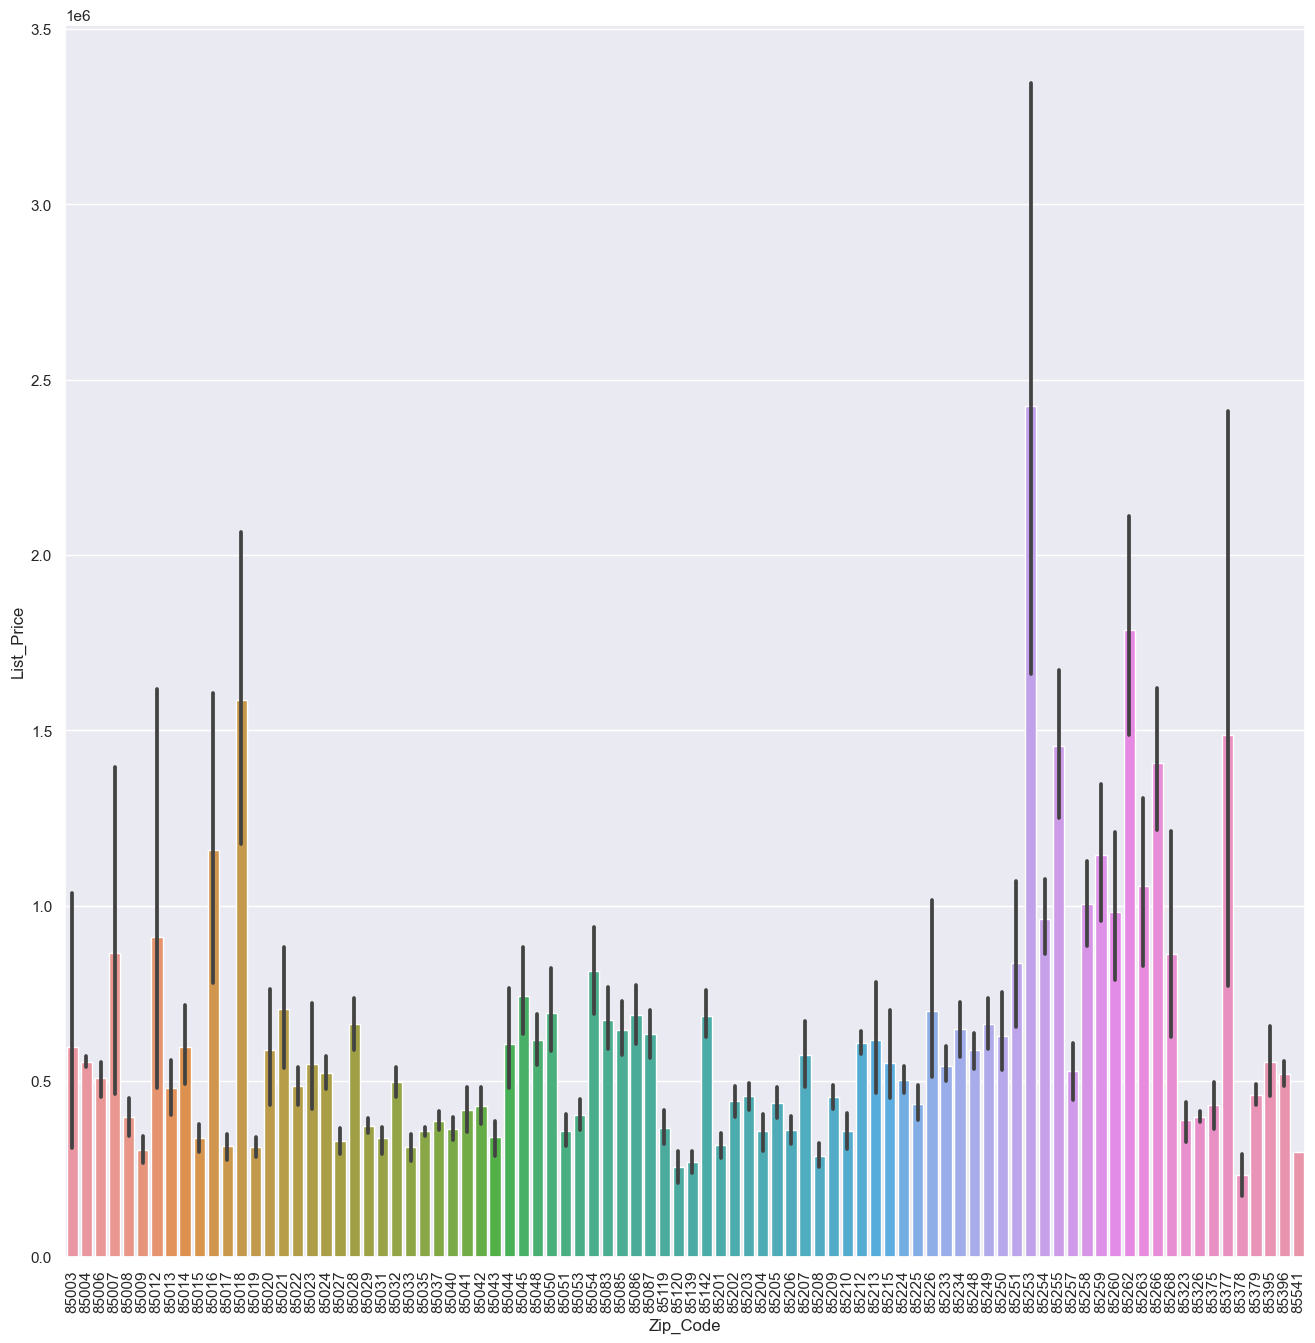

In [97]:
# Mean List_Price by Zip Code
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x="Zip_Code", y="List_Price", estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [98]:
# The zip codes are already sorted
# There are clusters of zip codes where the list prices are higher
# Plot the same for "Sold_Price"
# Calculate per sq ft price and make the same plot as above


In [99]:
housing_data['Price_per_SqFt'].describe()
# the max value shows there is an error

count      3117.000000
mean        362.590696
std        3131.718320
min          14.160000
25%         237.480000
50%         284.260000
75%         342.000000
max      175000.000000
Name: Price_per_SqFt, dtype: float64

In [100]:
housing_data[housing_data['Price_per_SqFt'] == housing_data['Price_per_SqFt'].max()]  # the typo is at Approx_SQFT. it should be 740 not 1.

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
1197,85120,TH,2,1.0,1,175000.0,Attached,1986,740,no_pool,125.0,N,No,N,No,175000,175000,Missing,No,No,0.0,1.0,Cash,Fixed,0,0.0,0.0


In [101]:
# use the .loc accessor to modify this value with the correct value of 740
housing_data.loc[1197, 'Price_per_SqFt'] = 740

In [102]:
housing_data[housing_data['Price_per_SqFt'] == housing_data['Price_per_SqFt'].max()]  # the typo is at Approx_SQFT. it should be 740 not 1.

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
2400,85254,AF,3,3.0,2232,1433.69,Stacked,2018,2233,Community,400.0,N,No,N,No,3200000,3200000,Missing,No,No,3.0,0.0,Other,Missing,0,0.0,500.0


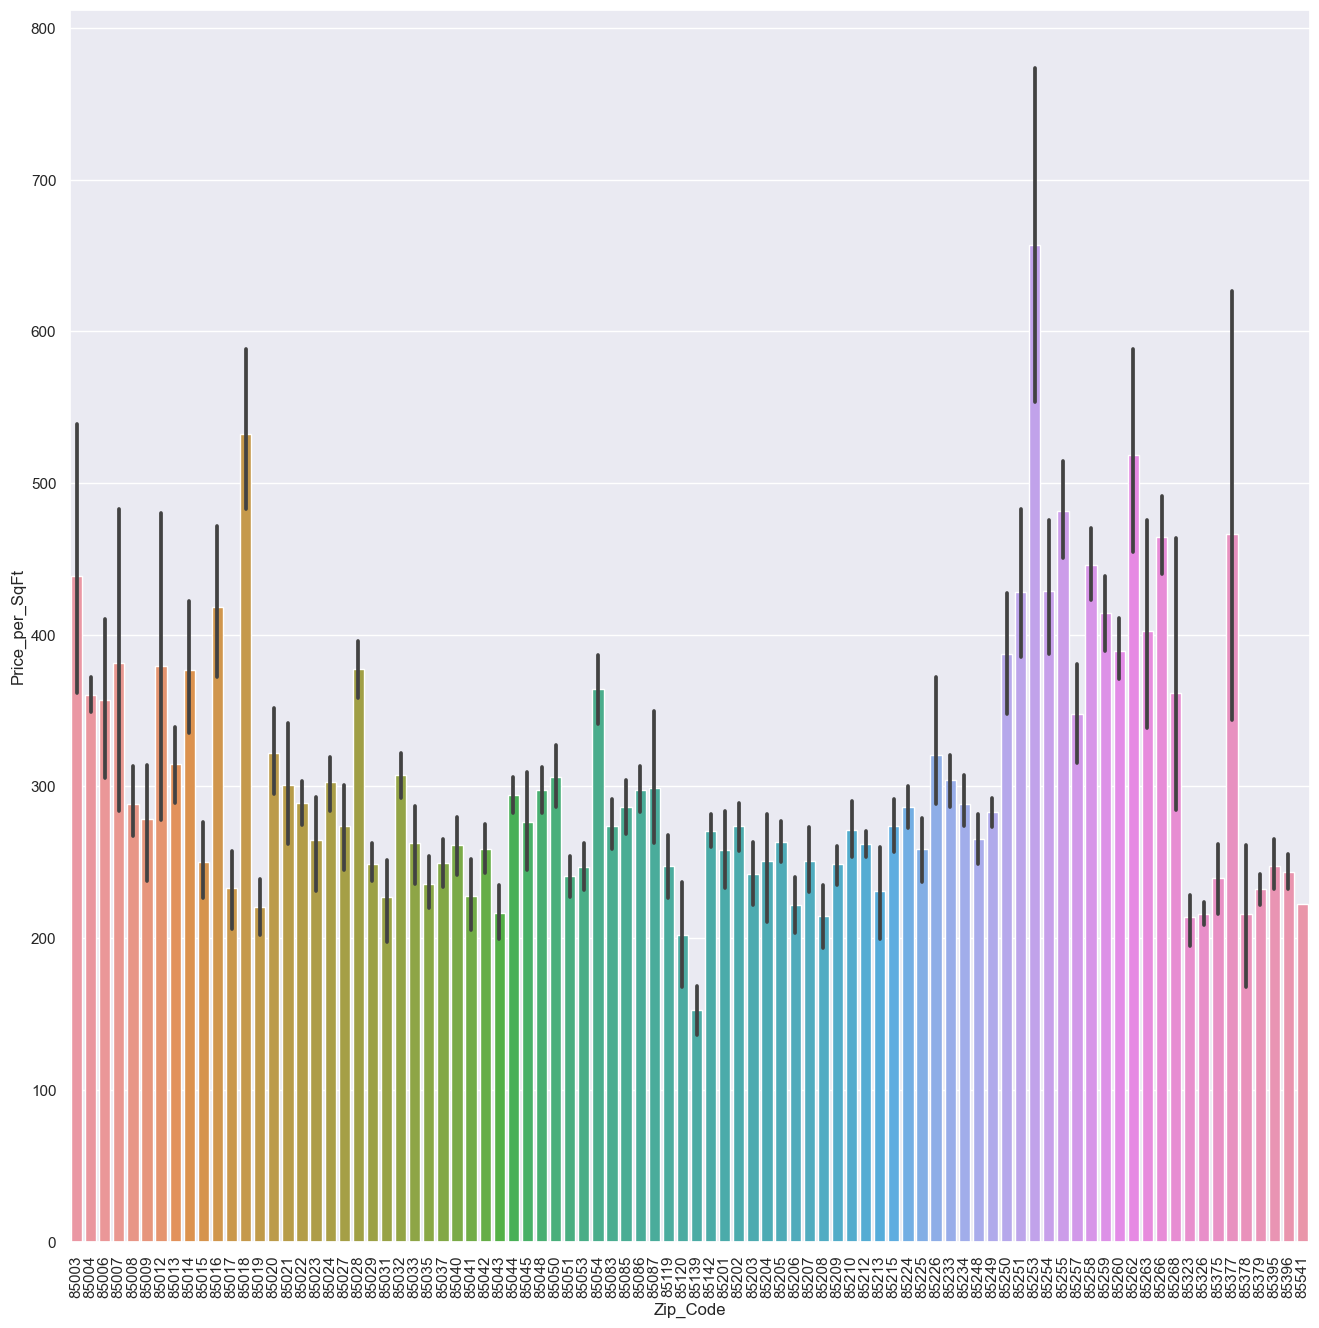

In [103]:
# Mean Price_per_SqFt by Zip Code
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x="Zip_Code", y="Price_per_SqFt", estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

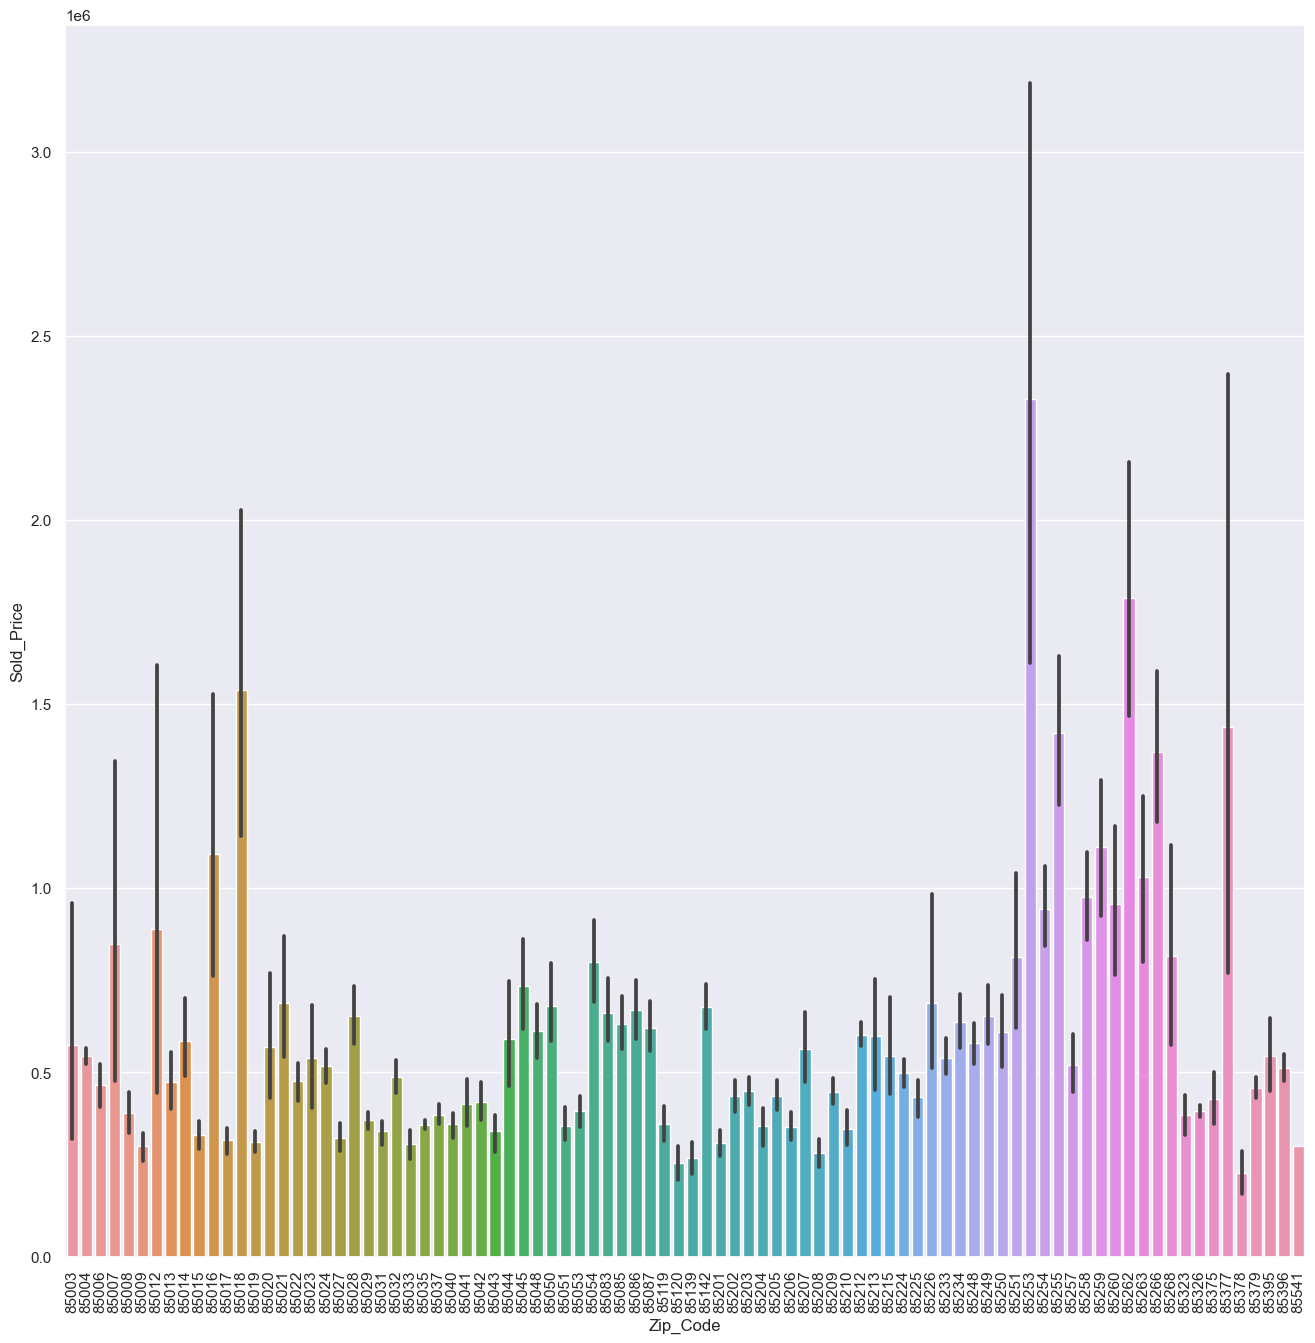

In [104]:
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x='Zip_Code', y='Sold_Price', estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

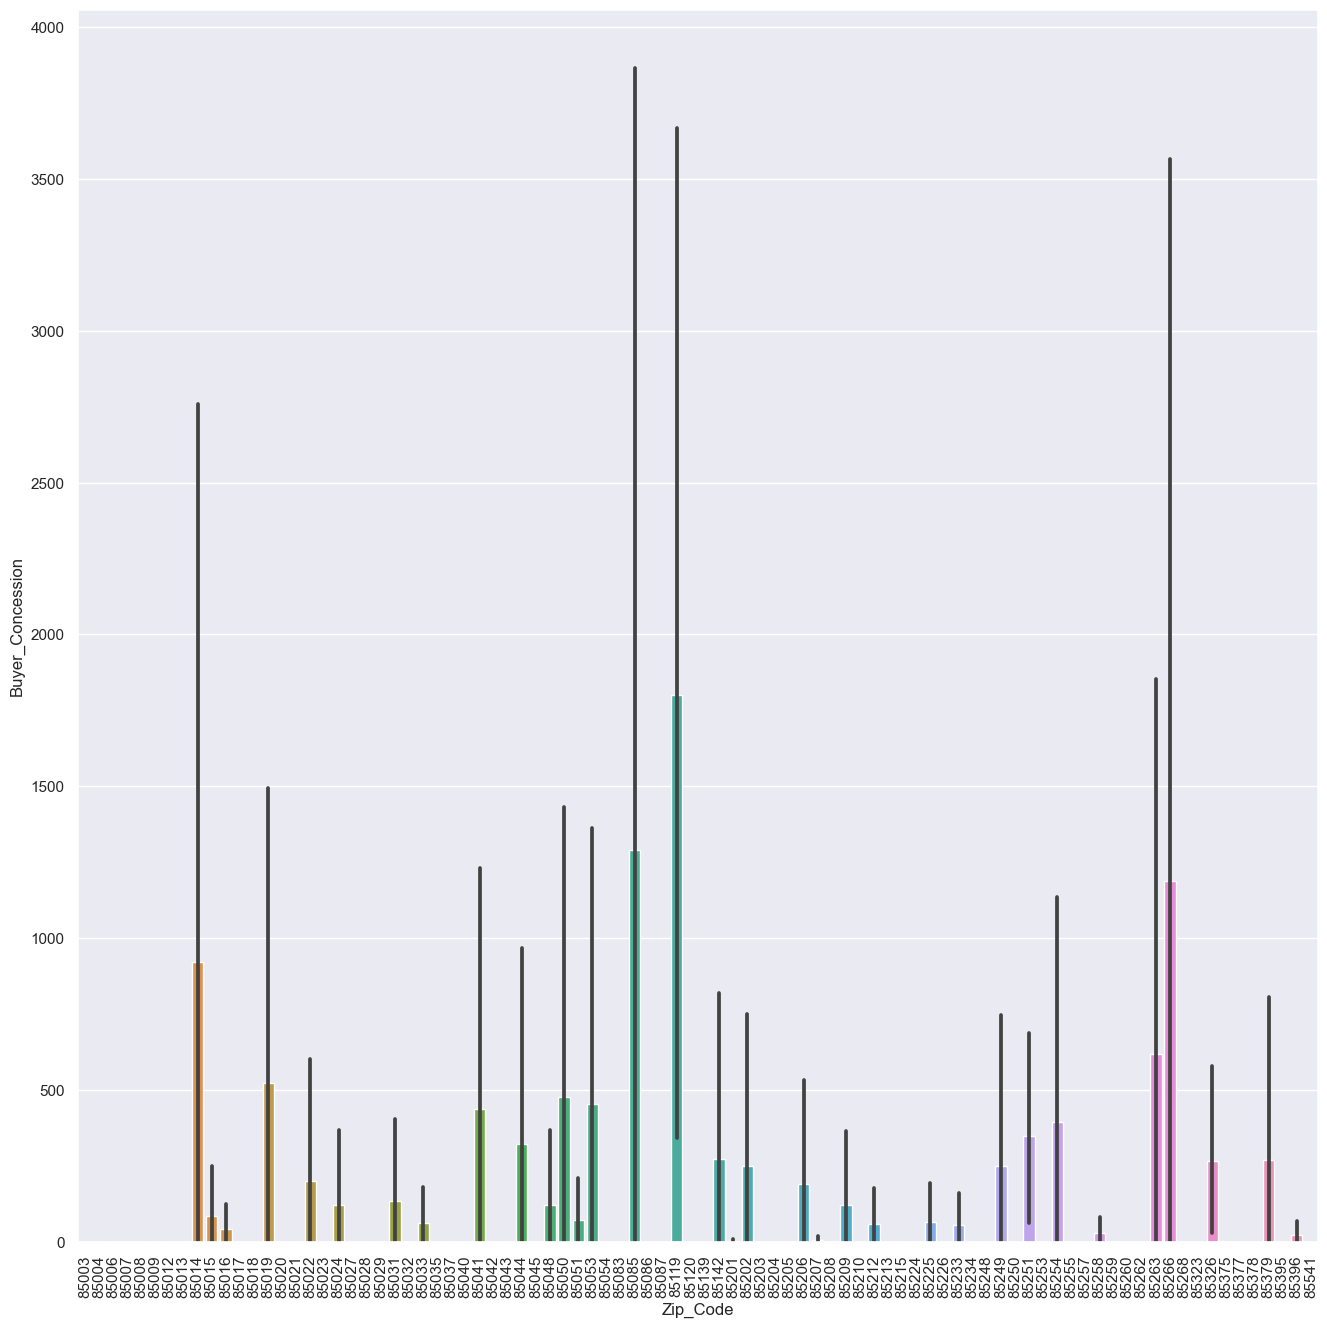

In [105]:
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x='Zip_Code', y='Buyer_Concession', estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

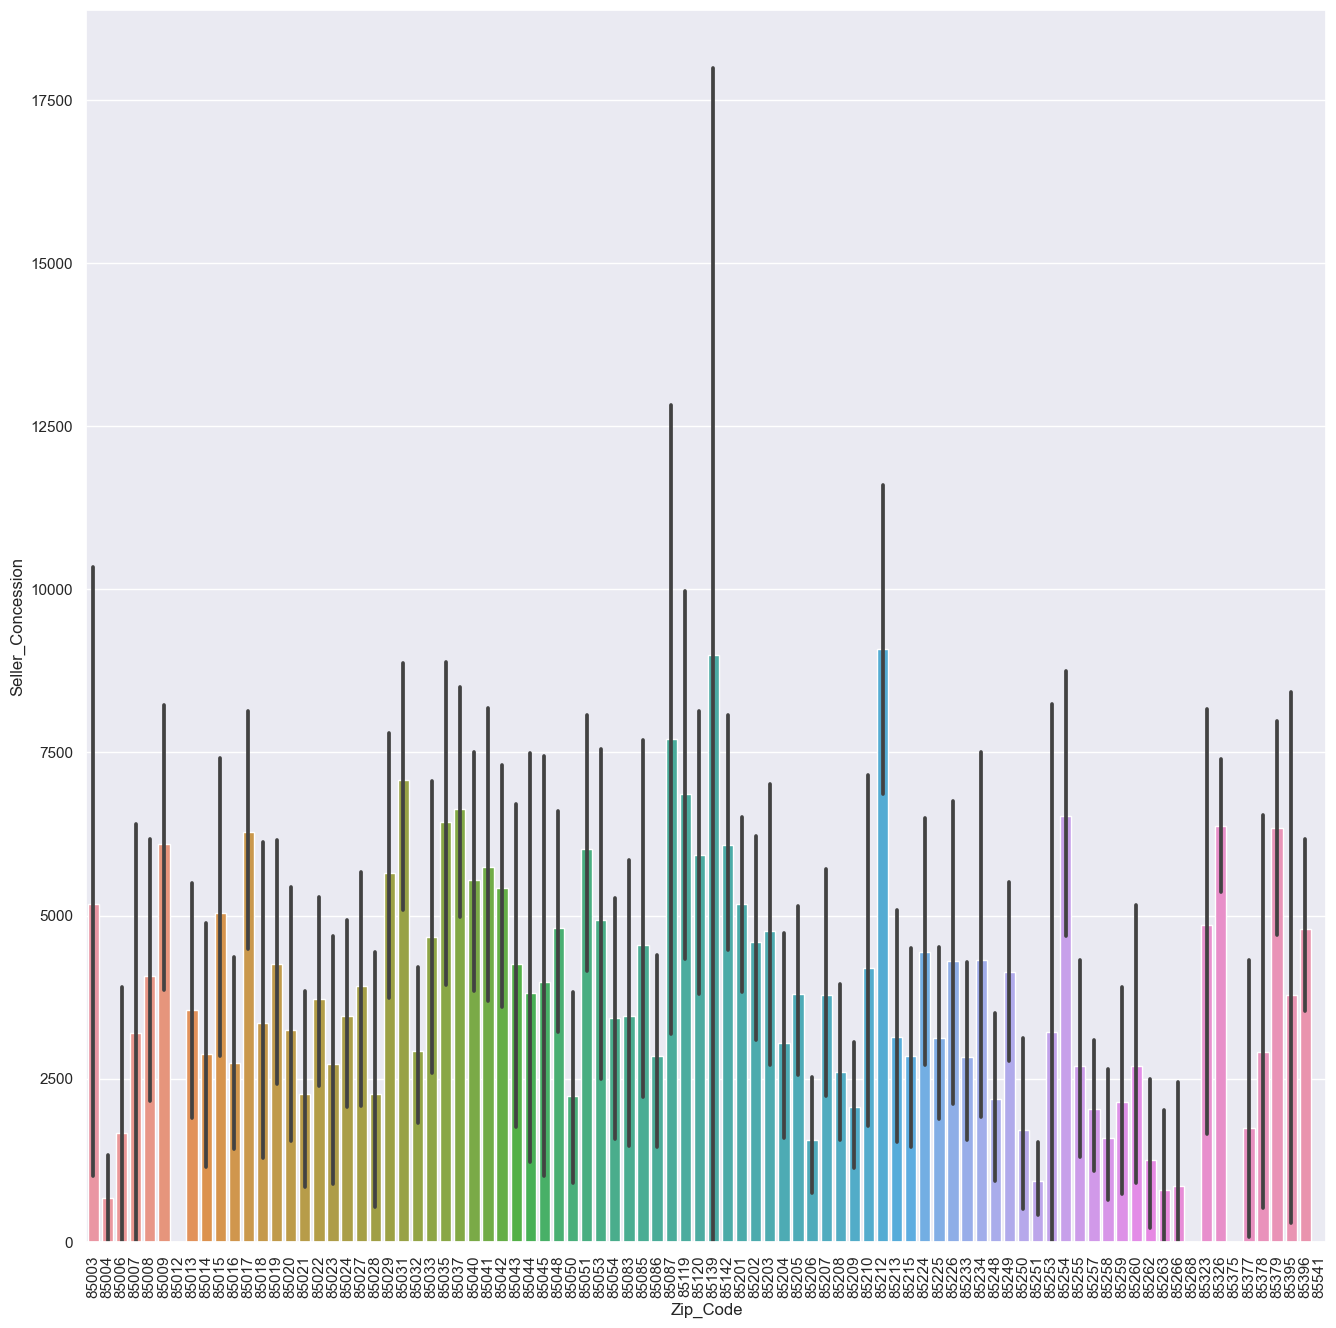

In [106]:
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x='Zip_Code', y='Seller_Concession', estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show

# there is a buyer concession outlier

In [107]:
housing_data.loc[housing_data['Buyer_Concession'] ==housing_data['Buyer_Concession'].max()]
# the maximum buyer concession is $26700 which is almost a wash in that particular instance because seller also offered a $22,250 concession

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
1003,85085,SF,4,3.0,3550,459.15,Detached,2023,54450,no_pool,180.0,N,Yes,N,No,1675000,1630000,Missing,No,No,6.0,0.0,Conventional,Other,0,50250.0,41875.0


In [108]:
housing_data.loc[housing_data['Seller_Concession'] ==housing_data['Seller_Concession'].max()]
# the maximum buyer concession is $57700 (representing 3% of sold price)

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
1575,85207,SF,4,4.5,4505,421.75,Detached,2017,33433,Both,764.5,N,Yes,N,No,1900000,1900000,Missing,No,No,3.0,0.0,Conventional,Fixed,0,0.0,57000.0


In [109]:
# There are 27 rows where "Sold_Price" is higher than "List Price"
housing_data[housing_data["List_Price"] < housing_data["Sold_Price"]]

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,Community,567.93,N,Yes,N,No,469900,475000,High Rise,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25
30,85008,SF,4,2.0,1562,220.87,Detached,1955,6756,no_pool,241.84,N,No,N,No,344500,345000,Missing,No,No,0.0,1.0,Conventional,Other,0,0.0,8612.50
43,85008,TH,2,2.0,1206,290.21,Attached,2005,1146,Community,NaN,N,No,N,No,347000,350000,Missing,No,No,1.0,0.0,VA,Missing,1,0.0,1750.00
46,85008,SF,4,2.0,1366,296.48,Detached,1950,7780,no_pool,NaN,N,No,N,No,390000,405000,Missing,No,No,0.0,1.0,VA,Missing,1,0.0,0.00
48,85008,SF,5,1.0,1454,244.15,Detached,1948,9535,no_pool,NaN,N,No,N,No,349900,355000,Missing,No,No,0.0,2.0,Cash,Missing,1,0.0,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,85396,SF,2,2.0,1378,326.56,Detached,2022,4946,Community,504.00,N,No,N,No,449000,450000,Missing,No,No,2.0,0.0,Conventional,Missing,0,0.0,0.00
3106,85396,TH,2,2.5,1278,308.57,Detached,2023,3755,Community,130.00,N,No,N,No,389349,394349,Missing,No,No,2.0,0.0,Conventional,Missing,0,0.0,5000.00
3109,85396,SF,4,3.0,2684,162.07,Detached,2021,9218,no_pool,118.00,N,No,N,No,432000,435000,Missing,No,No,2.0,0.0,FHA,Missing,0,0.0,12960.00
3113,85396,SF,2,3.0,1854,237.32,Detached,2007,5861,Community,NaN,N,No,N,No,429900,440000,Missing,No,No,2.0,0.0,Conventional,Missing,1,0.0,10000.00


In [110]:
# You can calculate the difference between "List_Price" and "Sold_Price"
# and do the same plotting across zip codes
housing_data['diff_List_Sold'] = housing_data['Sold_Price'] - housing_data['List_Price']

In [114]:
housing_data.loc[housing_data['diff_List_Sold'] == housing_data['diff_List_Sold'].max()]
# list price is $2,995,000 and it was sold for $4,834,665 !!!!  house sold for 38% less than list price (MLS# 6149589)

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
2695,85262,SF,3,3.5,4415,1095.05,Detached,2021,22412,Private,300.0,N,No,N,No,2995000,4834665,Missing,No,No,3.0,0.0,Other,Other,0,0.0,0.0,1839665


In [115]:
housing_data.loc[housing_data['diff_List_Sold'] == housing_data['diff_List_Sold'].min()]
# list price is $8,250,000 and it was sold for 7.5% less which looks okay

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
148,85016,SF,5,6.0,7610,1002.1,Detached,2018,83044,Private,415.0,N,Yes,N,No,8250000,7626000,High Rise,Yes,Yes,4.0,0.0,Cash,Fixed,0,0.0,0.0,-624000


<function matplotlib.pyplot.show(close=None, block=None)>

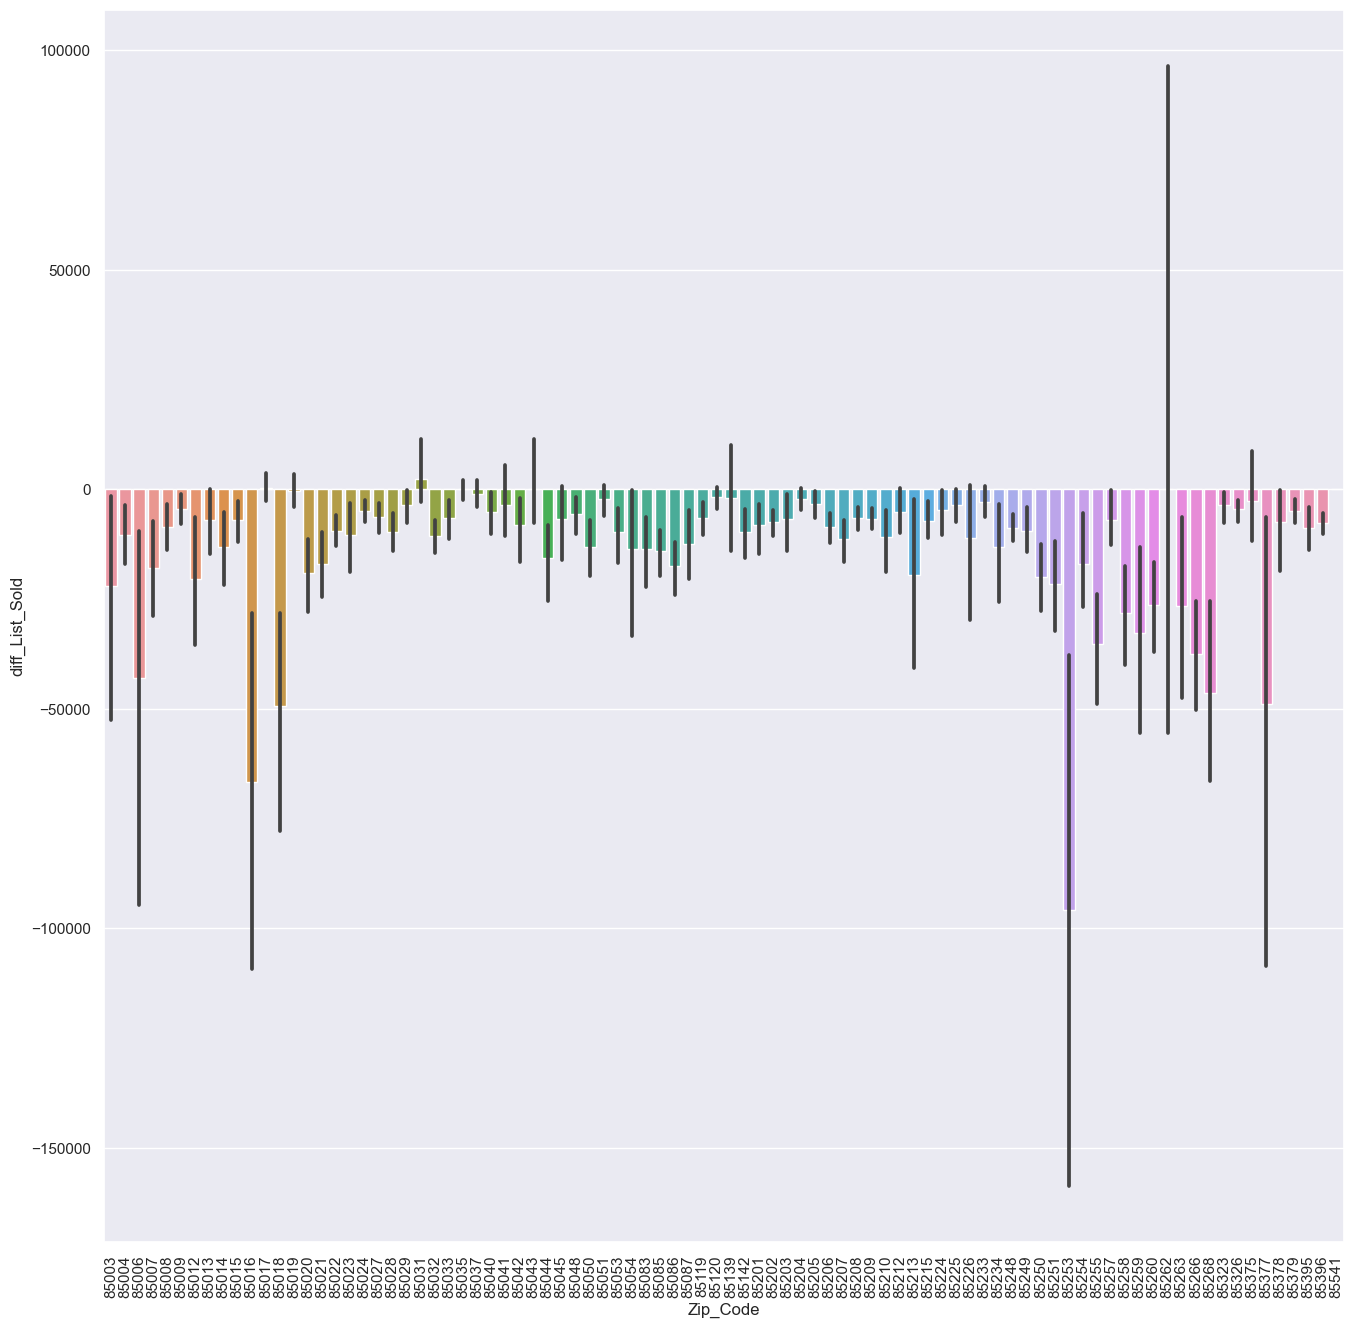

In [111]:
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x='Zip_Code', y='diff_List_Sold', estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show

# there is a buyer concession outlier

In [112]:
# There are 27 rows where "Sold_Price" is higher than "List Price"
housing_data[housing_data["List_Price"] > housing_data["Sold_Price"]]

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,Community,567.00,N,Yes,N,Yes,247000,245000,High Rise,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.0,-2000
1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,Private,631.00,N,Yes,N,Yes,335000,325000,High Rise,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.0,-10000
2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,no_pool,555.63,N,Yes,Y,Yes,1595000,1500000,High Rise,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.0,-95000
3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,Community,671.17,N,Yes,N,Yes,315000,310000,High Rise,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.0,-5000
5,85003,AF,1,1.0,893,671.89,Attached,2016,820,Community,1280.40,N,Yes,N,No,625000,600000,High Rise,No,Yes,1.0,0.0,Cash,Fixed,0,0.0,0.0,-25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,85396,SF,4,3.0,2516,188.79,Detached,2016,5367,Community,504.00,N,No,N,No,495000,475000,Missing,No,No,3.0,0.0,Cash,Missing,0,0.0,0.0,-20000
3108,85396,SF,2,2.0,1684,270.01,Detached,2018,3595,Community,504.00,N,No,N,No,479900,454700,Missing,No,No,2.0,0.0,Other,Missing,0,0.0,0.0,-25200
3110,85396,SF,3,2.0,2337,237.48,Detached,2014,8800,Community,315.00,N,No,N,No,562000,555000,Missing,No,No,2.5,0.0,Conventional,Missing,0,0.0,0.0,-7000
3112,85396,SF,2,2.0,1244,270.50,Detached,2020,6648,no_pool,130.00,N,No,N,No,337500,336500,Missing,No,No,2.0,0.0,Conventional,Missing,0,0.0,1000.0,-1000


In [113]:
# There are 27 rows where "Sold_Price" is higher than "List Price"
housing_data[housing_data["List_Price"] == housing_data["Sold_Price"]]

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,HOA_Fee,Land_Lease_Fee,Clubhouse_Rec_Room,Basement,RV_Gate,List_Price,Sold_Price,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
8,85004,AF,2,2.0,1624,354.06,Stacked,2004,924,Community,1280.40,N,Yes,N,No,575000,575000,High Rise,No,No,2.0,0.0,Conventional,Fixed,0,0.0,2000.00,0
11,85004,AF,2,2.0,1624,354.06,Stacked,2004,924,Community,NaN,N,No,N,No,575000,575000,Missing,No,No,2.0,0.0,Conventional,Fixed,1,0.0,2000.00,0
12,85006,SF,4,2.0,1834,327.09,Detached,1963,8120,no_pool,NaN,N,No,N,No,599900,599900,Missing,No,No,0.0,2.0,Conventional,Fixed,1,0.0,0.00,0
14,85006,SF,3,2.0,1383,390.38,Detached,1943,6347,no_pool,NaN,N,No,N,No,539900,539900,Missing,No,No,0.0,2.0,Conventional,Other,1,0.0,5000.00,0
15,85006,SF,2,2.0,1170,350.42,Detached,2007,6875,no_pool,NaN,N,No,N,No,410000,410000,Missing,No,No,0.0,0.0,Conventional,Missing,1,0.0,10000.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,85396,MM,4,2.0,2280,168.86,Detached,2006,44453,no_pool,95.50,N,No,N,No,385000,385000,Missing,No,No,0.0,0.0,FHA,Missing,0,0.0,11550.00,0
3104,85396,SF,4,2.5,2296,256.96,Detached,2024,8886,no_pool,130.00,N,No,N,No,589990,589990,Missing,No,No,3.0,0.0,Conventional,Missing,0,0.0,7375.85,0
3107,85396,SF,3,2.5,2472,260.07,Detached,2018,7205,Community,84.75,N,No,N,No,642900,642900,Missing,No,No,2.5,0.0,Cash,Missing,0,0.0,0.00,0
3111,85396,SF,2,2.0,1258,317.17,Detached,2023,3600,Community,130.00,N,No,N,No,399000,399000,Missing,No,No,2.0,0.0,Conventional,Missing,0,0.0,0.00,0
